In [0]:
import sqlite3
connection = sqlite3.connect('final.sqlite')


In [0]:
import pandas as pd
import numpy as np
import nltk
final = pd.read_sql_query(""" SELECT * FROM Reviews """,connection)

In [3]:
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,UPDATEDTEXT
0,22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,0,1192060800,made in china,My dogs loves this chicken but its a product f...,dogs loves chicken product china wont buying a...
1,22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,dogs love saw pet store tag attached regarding...
2,70677,76870,B00002N8SM,A19Q006CSFT011,Arlielle,0,0,0,1288396800,only one fruitfly stuck,"I had an infestation of fruitflies, they were ...",infestation fruitflies literally everywhere fl...
3,70676,76869,B00002N8SM,A1FYH4S02BW7FN,wonderer,0,0,0,1290038400,Doesn't work!! Don't waste your money!!,Worst product I have gotten in long time. Woul...,worst product gotten long time would rate no s...
4,70675,76868,B00002N8SM,AUE8TB5VHS6ZV,eyeofthestorm,0,0,0,1306972800,A big rip off,I wish I'd read the reviews before making this...,wish would read reviews making purchase basica...


In [4]:
final.shape

(87773, 12)

In [5]:
final['UPDATEDTEXT']

0        dogs loves chicken product china wont buying a...
1        dogs love saw pet store tag attached regarding...
2        infestation fruitflies literally everywhere fl...
3        worst product gotten long time would rate no s...
4        wish would read reviews making purchase basica...
5        happy item many flies disturbing kitchen put p...
6        thing item trapped fruit flies not work fly tr...
7        nurturing plant work well decided repot larger...
8        placed around house several days setup fly att...
9        please not waste money fly trap absolutely use...
10       let put way flies stay traps left looks like s...
11       not know product performs big flies sucks frui...
12       flies buzz around thing like not even many fli...
13       horrible product first item not work week lots...
14       never caught even one fly got inside left week...
15       ineffective worthless bought product indoors t...
16       problem lot fruit flies kitchen picked one tak.

In [7]:
final["Score"].value_counts()

1    73592
0    14181
Name: Score, dtype: int64

In [0]:
df=pd.DataFrame(final)

In [0]:
df.drop("Text",axis = 1, inplace = True)

In [0]:
Y1=df["Score"].values

In [0]:
df.drop("Score",axis = 1, inplace = True)

In [14]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,UPDATEDTEXT
0,22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,1192060800,made in china,dogs loves chicken product china wont buying a...
1,22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,1195948800,Dog Lover Delites,dogs love saw pet store tag attached regarding...
2,70677,76870,B00002N8SM,A19Q006CSFT011,Arlielle,0,0,1288396800,only one fruitfly stuck,infestation fruitflies literally everywhere fl...
3,70676,76869,B00002N8SM,A1FYH4S02BW7FN,wonderer,0,0,1290038400,Doesn't work!! Don't waste your money!!,worst product gotten long time would rate no s...
4,70675,76868,B00002N8SM,AUE8TB5VHS6ZV,eyeofthestorm,0,0,1306972800,A big rip off,wish would read reviews making purchase basica...


In [0]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['UPDATEDTEXT'],Y1, test_size=0.3, shuffle=False)

In [17]:
print(X1_train.shape, Y1_train.shape)
#print(X1_cv.shape, Y1_cv.shape)
print(X1_test.shape, Y1_test.shape)

(61441,) (61441,)
(26332,) (26332,)


In [18]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X1_train)

X_train = tokenizer.texts_to_sequences(X1_train)


Using TensorFlow backend.


In [0]:
X_test = tokenizer.texts_to_sequences(X1_test)

In [20]:
print(X_train[0])

[55, 63, 132, 9, 690, 2012, 117, 683, 116, 26, 132, 106, 44, 1027, 5, 4110, 135, 3, 9, 2012, 152, 4490, 1853, 61, 161, 690]


In [22]:
len(X_train[0])

26

In [21]:
print(X_test[0])

[41, 118, 655, 2243, 22, 63, 99, 669, 387, 285, 27]


In [24]:
from keras.preprocessing import sequence
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[0])

(61441, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auc_roc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

# 1 LSTM Layer :

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

batch_size=200
epochs=10



model = Sequential()
model.add(Embedding(5000, 32, input_length=max_review_length))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc_roc])

history = model.fit(X_train, np.array(Y1_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(X_test, Y1_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
batch_normalization_6 (Batch (None, 600, 32)           128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 600, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 242,689
Trainable params: 242,625
Non-trainable params: 64
_________________________________________________________________
Tra

In [39]:
%matplotlib inline
!python -m rasa_nlu.evaluate -d  nlu.md -m <path to model>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `python -m rasa_nlu.evaluate -d  nlu.md -m <path to model>'


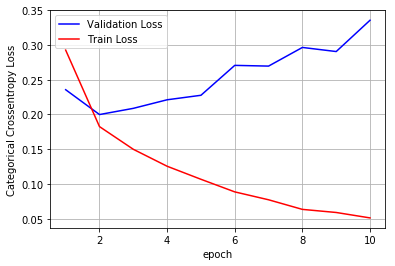

In [40]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 2 LSTM Layers :

In [41]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

batch_size=200
epochs=10



model = Sequential()
model.add(Embedding(5000, 32, input_length=max_review_length))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(128,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))
model.summary()



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc_roc])

history = model.fit(X_train, np.array(Y1_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(X_test, Y1_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
batch_normalization_7 (Batch (None, 600, 32)           128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 600, 32)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 600, 128)          82432     
_________________________________________________________________
batch_normalization_8 (Batch (None, 600, 128)          512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 600, 128)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
__________

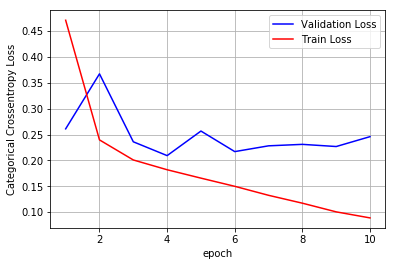

In [42]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 4 LSTM Layers :

In [43]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size=200
epochs=10



model = Sequential()
model.add(Embedding(5000, 32, input_length=max_review_length))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(128,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(98,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(70,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(40))
model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Dense(1, activation='sigmoid'))
model.summary()



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc_roc])

history = model.fit(X_train, np.array(Y1_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(X_test, Y1_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
batch_normalization_10 (Batc (None, 600, 32)           128       
_________________________________________________________________
dropout_16 (Dropout)         (None, 600, 32)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 600, 128)          82432     
_________________________________________________________________
batch_normalization_11 (Batc (None, 600, 128)          512       
_________________________________________________________________
dropout_17 (Dropout)         (None, 600, 128)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 600, 98)           88984     
__________

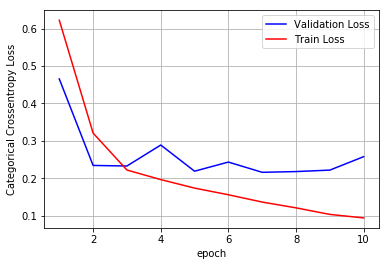

In [46]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 5 LSTM Layers :

In [47]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from keras.layers.normalization import BatchNormalization


batch_size=200
epochs=10



model = Sequential()
model.add(Embedding(54923, 32, input_length=max_review_length))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(128,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(98,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(70,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(40,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(60))
model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Dense(1, activation='sigmoid'))
model.summary()



model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc_roc])

history = model.fit(X_train, np.array(Y1_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(X_test, Y1_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 600, 32)           1757536   
_________________________________________________________________
batch_normalization_21 (Batc (None, 600, 32)           128       
_________________________________________________________________
dropout_27 (Dropout)         (None, 600, 32)           0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 600, 128)          82432     
_________________________________________________________________
batch_normalization_22 (Batc (None, 600, 128)          512       
_________________________________________________________________
dropout_28 (Dropout)         (None, 600, 128)          0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 600, 98)           88984     
__________

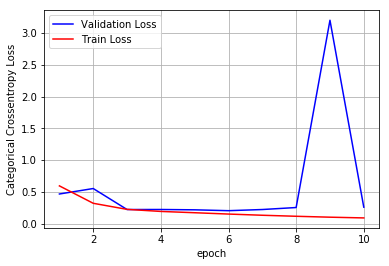

In [48]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# CONCLUSIONS :

In [3]:
from prettytable import PrettyTable
ptable = PrettyTable()
Test=[94.02,94.31,94.76,94.72]
No=[" 1 LSTM Layer ", "2 LSTM Layer","4 LSTM Layer","5 LSTM Layer" ]
Neurons=["128","128-64","128-98-70-40","128-98-70-40-60"]
ptable.add_column("SrNo",[1,2,3,4])
ptable.add_column("No. of LSTM Layers",No)
ptable.add_column("No. of neurons in LSTM Layers",Neurons)
ptable.add_column(" Test AUC After 10 epoch ",Test)
print(ptable)

+------+--------------------+-------------------------------+---------------------------+
| SrNo | No. of LSTM Layers | No. of neurons in LSTM Layers |  Test AUC After 10 epoch  |
+------+--------------------+-------------------------------+---------------------------+
|  1   |    1 LSTM Layer    |              128              |           94.02           |
|  2   |    2 LSTM Layer    |             128-64            |           94.31           |
|  3   |    4 LSTM Layer    |          128-98-70-40         |           94.76           |
|  4   |    5 LSTM Layer    |        128-98-70-40-60        |           94.72           |
+------+--------------------+-------------------------------+---------------------------+


<H3>For Batch size = 200 and epoch = 10 <br></H3>
1] If we add only 1 LSTM layer with batchnormalization and dropout the model overfits more as seen in the plot, the difference between train and test error is more.<br>
2] For 2 LSTM Layers with batchnormalization and dropout the model overfits but less compared to only 1 layer of LSTM.<br>
3] For 4 LSTM Layers, the model overfits less than with 1 and 2 layers.<br>
4] For 5 LSTM Layers, the model performs better and gives test AUC of 94.72.<br>